In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tf_utils import random_mini_batches, predict

Load datasets

trainset's shape is (24709, 784)

Valset's shape is (2746, 784)

testset's shape is (27455, 784)

In [2]:
print(os.listdir("/Users/martinyeh/Desktop/DeepLearning_WU/myproject/CNN/dataset"))

['sign_mnist_test.csv', 'sign_mnist_train.csv']


In [3]:
train = pd.read_csv("/Users/martinyeh/Desktop/DeepLearning_WU/myproject/CNN/dataset/sign_mnist_train.csv")
print(train.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [4]:
test = pd.read_csv("/Users/martinyeh/Desktop/DeepLearning_WU/myproject/CNN/dataset/sign_mnist_test.csv")
print(test.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
Y_test = train["label"]
X_test = train.drop(labels = ["label"],axis = 1) 

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

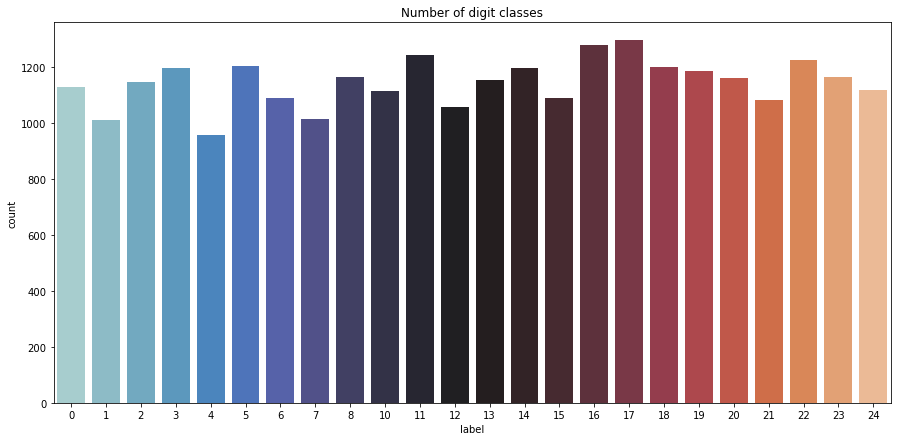

In [6]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

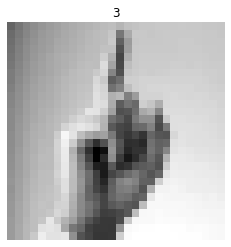

In [7]:
# plot some samples
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)
print("y_train shape: ",Y_train.shape)
print("y_test shape: ",Y_test.shape)

x_train shape:  (27455, 784)
x_test shape:  (27455, 784)
y_train shape:  (27455,)
y_test shape:  (27455,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (24709, 784)
x_val shape (2746, 784)
y_train shape (24709,)
y_val shape (2746,)


In [10]:
# Reshape
X_train = X_train.values.reshape(X_train.shape[0], -1).T
X_val = X_val.values.reshape(X_val.shape[0], -1).T
X_test = X_test.values.reshape(X_test.shape[0], -1).T
print("x_train shape: ",X_train.shape)
print("x_val shape: ",X_val.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (784, 24709)
x_val shape:  (784, 2746)
x_test shape:  (784, 27455)


In [11]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 25).reshape(Y_train.shape[0], -1).T
Y_val = to_categorical(Y_val, num_classes = 25).reshape(Y_val.shape[0], -1).T
Y_test = to_categorical(Y_test, num_classes = 25).reshape(Y_test.shape[0], -1).T
print("y_train shape: ",Y_train.shape)
print("y_val shape: ",Y_val.shape)
print("y_test shape: ",Y_test.shape)

Using TensorFlow backend.


y_train shape:  (25, 24709)
y_val shape:  (25, 2746)
y_test shape:  (25, 27455)


In [12]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 28 * 28 * 1 = 784)
    n_y -- scalar, number of classes (from 0 to 24, so -> 25)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"

    """

    X = tf.compat.v1.placeholder(tf.float32,shape=[n_x, None], name = "X")
    Y = tf.compat.v1.placeholder(tf.float32,shape=[n_y, None], name = "Y")
    
    return X, Y

In [13]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [50, 784]
                        b1 : [50, 1]
                        W2 : [30, 50]
                        b2 : [30, 1]
                        W3 : [25, 30]
                        b3 : [25, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
        
   
    
    W1 = tf.Variable(tf.glorot_uniform_initializer()((50, 784))) #xavier_initializer()
    b1 = tf.Variable(tf.zeros_initializer()((50, 1)))
    W2 = tf.Variable(tf.glorot_uniform_initializer()((30, 50)))
    b2 = tf.Variable(tf.zeros_initializer()((30, 1)))
    W3 = tf.Variable(tf.glorot_uniform_initializer()((25, 30)))
    b3 = tf.Variable(tf.zeros_initializer()((25, 1)))


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [14]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    
    Z1 = tf.add(tf.matmul(W1,X),b1)                        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                       # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                       # Z3 = np.dot(W3, A2) + b3
    
    
    return Z3

In [15]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (25, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    
    cost = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(labels = labels,logits = logits))
    
    
    return cost

In [16]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 784, number of training examples = 24709)
    Y_train -- test set, of shape (output size = 25, number of training examples = 24709)
    X_test -- training set, of shape (input size = 784, number of training examples = 2476)
    Y_test -- test set, of shape (output size = 25, number of test examples = 2476)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    tf.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.compat.v1.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / minibatch_size

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Val Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Cost after epoch 0: 71.962019
Cost after epoch 100: 0.734270
Cost after epoch 200: 0.098340
Cost after epoch 300: 0.005985
Cost after epoch 400: 0.003106
Cost after epoch 500: 0.001320
Cost after epoch 600: 0.000821
Cost after epoch 700: 0.000592
Cost after epoch 800: 0.000319
Cost after epoch 900: 0.070827
Cost after epoch 1000: 0.000157
Cost after epoch 1100: 0.000150
Cost after epoch 1200: 0.000085
Cost after epoch 1300: 0.000068
Cost after epoch 1400: 0.000113


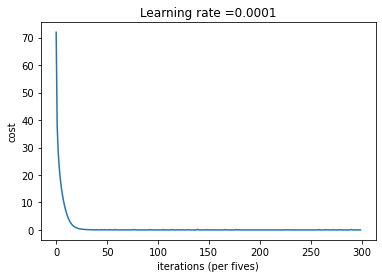

Parameters have been trained!
Train Accuracy: 1.0
Val Accuracy: 1.0


In [17]:
parameters = model(X_train, Y_train, X_val, Y_val)

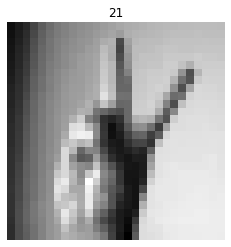

In [18]:
test1 = pd.read_csv("/Users/martinyeh/Desktop/DeepLearning_WU/myproject/CNN/dataset/sign_mnist_test.csv")
X_test1 = test1.drop(labels = ["label"],axis = 1)
img = X_test1.iloc[5].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(test1.iloc[5,0])
plt.axis("off")
plt.show()

In [19]:
X_test1=X_test1/ 255.0
my_image_prediction = predict(X_test1.iloc[5].values.reshape((784,1)), parameters)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

Your algorithm predicts: y = 21
